In [4]:
from qulacs import Observable, QuantumState, QuantumCircuit, ParametricQuantumCircuit
from qulacs.gate import H
from qulacsvis import circuit_drawer
import numpy as np
import matplotlib.pyplot as plt

import time
import random
from qulacs.gate import DenseMatrix
from qulacs.circuit import QuantumCircuitOptimizer

from utility import *

## Define initial state

In [186]:
nqubits = 3
#state.set_computational_basis(0b110)
state = QuantumState(nqubits)
for i in range(nqubits):
    H(i).update_quantum_state(state)

print(state.get_vector())

[0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j
 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j]


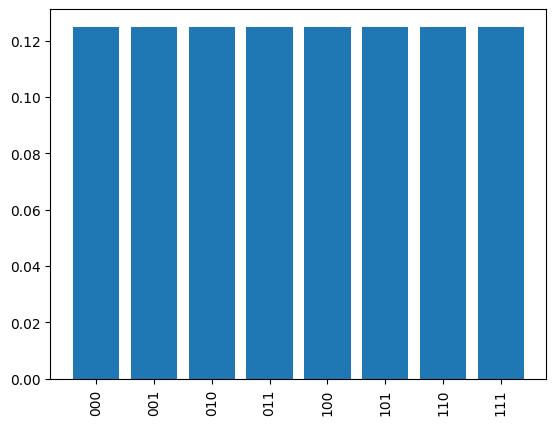

In [187]:
show_distribution(state)

## Construct $R$ gate

In [188]:
def CROT(index, r):
    CROT_matrix = np.array([[1, 0], [0, np.exp(1.0j*2*np.pi/2**r)]])
    gate_CROT = DenseMatrix(index, CROT_matrix)
    return gate_CROT

## Construct QFT circuit

In [189]:
def circuit_QFT(nqubits):
    circuit = QuantumCircuit(nqubits)
    
    for i in range(nqubits):
        if nqubits-1-i > 0:
            circuit.add_H_gate(nqubits-1-i)
            for j in reversed(range(nqubits-1-i)):
                CROT_tar = CROT(nqubits-1-i, 2+j)
                #print(2+j)
                control_index = nqubits-2-j-i
                control_with_value = 1
                CROT_tar.add_control_qubit(control_index, control_with_value)
                circuit.add_gate(CROT_tar)
        else:
            circuit.add_H_gate(nqubits-1-i)

    for i in range(nqubits//2):
            circuit.add_SWAP_gate(i, nqubits-i-1)

    return circuit

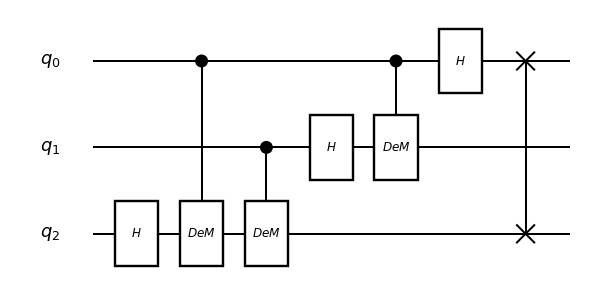

In [190]:
circuit_drawer(circuit_QFT(nqubits), "mpl")

In [191]:
circuit_QFT(nqubits).update_quantum_state(state)
print(state.get_vector())

[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


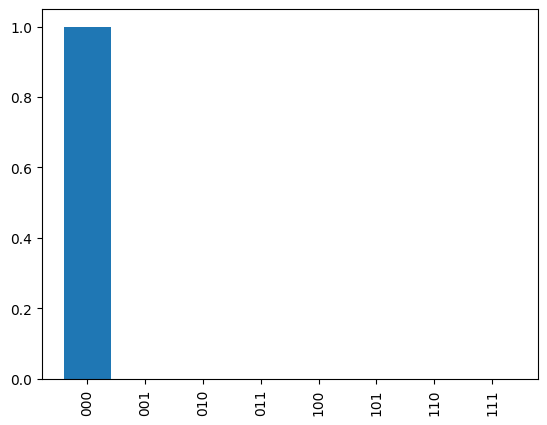

In [192]:
show_distribution(state)

## Construct $R^{\dag}$ gate

In [193]:
def CROT_dag(index, r):
    CROT_dag_matrix = np.array([[1, 0], [0, np.exp(-1.0j*2*np.pi/2**r)]])
    gate_CROT_dag = DenseMatrix(index, CROT_dag_matrix)
    return gate_CROT_dag

## Construct inverse QFT

In [194]:
def circuit_QFT_inv(nqubits):
    circuit = QuantumCircuit(nqubits)

    for i in range(nqubits//2):
            circuit.add_SWAP_gate(i, nqubits-i-1)
    
    for i in range(nqubits):
        if i ==0:
            circuit.add_H_gate(i)
        else:
            for j in range(i):
                CROT_dag_tar = CROT_dag(i, j+2)
                #print(j+2)
                control_index = i-j-1
                control_with_value = 1
                CROT_dag_tar.add_control_qubit(control_index, control_with_value)
                circuit.add_gate(CROT_dag_tar)
            circuit.add_H_gate(i)

    return circuit

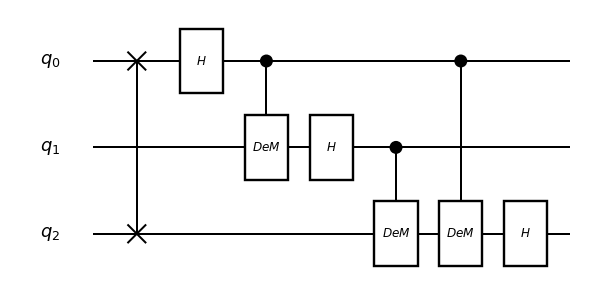

In [195]:
circuit_drawer(circuit_QFT_inv(nqubits), "mpl")

In [196]:
circuit_QFT_inv(nqubits).update_quantum_state(state)
print(state.get_vector())

[0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j
 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j]


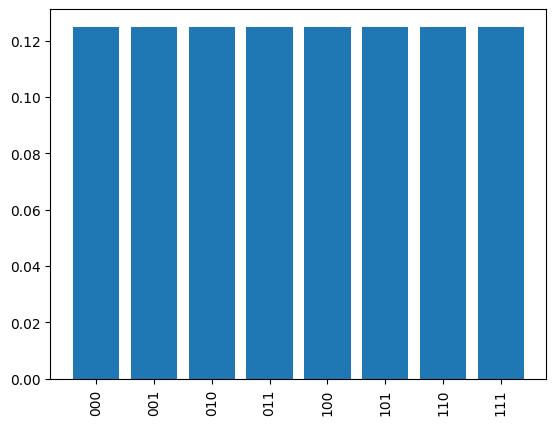

In [197]:
show_distribution(state)